In [33]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [34]:
model = YOLO("Pre-trained Models/yolov8s-seg.pt")  # yolov8s-seg.pt # yolov8m-seg.pt # yolov8l-seg.pt # yolov8x-seg.pt


0: 384x640 12 cars, 2 trucks, 173.2ms
Speed: 9.2ms preprocess, 173.2ms inference, 24.5ms postprocess per image at shape (1, 3, 384, 640)


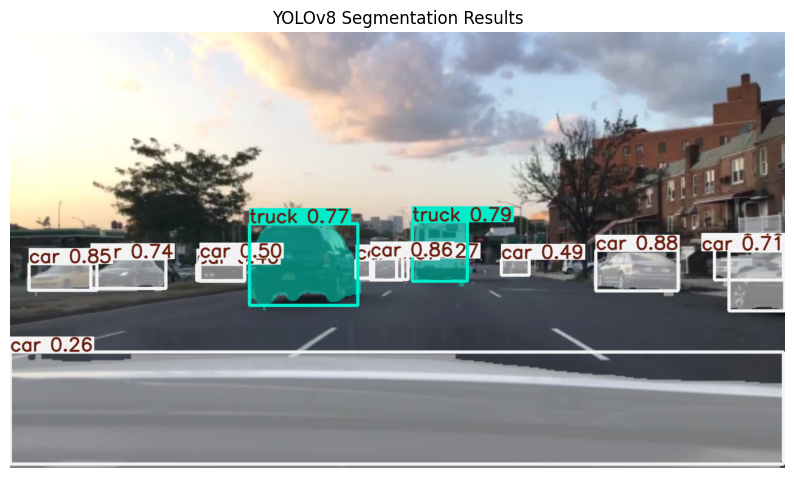

In [35]:
img = cv2.imread("assets/test/dashcam-val(c37b8378-9c23f3b3).jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model(img_rgb)[0]  # Get the first result
plt.figure(figsize=(10, 6))
plt.imshow(results.plot())  # Plot the results
plt.title("YOLOv8 Segmentation Results")
plt.axis('off')
plt.show()

In [38]:
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [39]:
model_name = "nvidia/segformer-b0-finetuned-cityscapes-1024-1024"
feature_extractor = SegformerImageProcessor.from_pretrained(model_name)
model2 = SegformerForSemanticSegmentation.from_pretrained(model_name)

c:\Users\porip\Documents\Pouria Ar\PouriaEdu\University2\Master Thesis\Code\ragbaarnet-env\Lib\site-packages\transformers\utils\deprecation.py:172: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


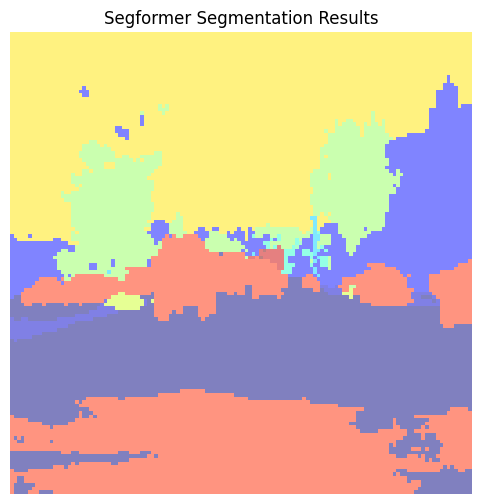

In [27]:
image = Image.open("assets/test/dashcam-val(c37b8378-9c23f3b3).jpg").convert("RGB")
inputs = feature_extractor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model2(**inputs)
logits = outputs.logits  # [1, num_classes, height, width]
preds = torch.argmax(logits, dim=1).cpu().numpy()[0]

plt.figure(figsize=(10, 6))
plt.imshow(preds, cmap='jet', alpha=0.5)  # Display the segmentation mask
plt.title("Segformer Segmentation Results")
plt.axis('off')
plt.show()

In [32]:
import tensorflow as tf
import cv2
import numpy as np

# دانلود مدل DeepLabV3+ با MobileNetV2
model = tf.keras.models.load_model("https://tfhub.dev/google/deeplabv3mnv2_pascal_trainval/1")

UnimplementedError: File system scheme 'https' not implemented (file: 'https://tfhub.dev/google/deeplabv3mnv2_pascal_trainval/1')